                                 OLS Regression Results                                
Dep. Variable:           goals_scored   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              156.1
Date:                Tue, 07 Jul 2020   Prob (F-statistic):                    5.83e-05
Time:                        13:03:02   Log-Likelihood:                         -7.2998
No. Observations:                   6   AIC:                                      16.60
Df Residuals:                       5   BIC:                                      16.39
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

C:\Users\ducnm\Anaconda3\envs\tf_gpu\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


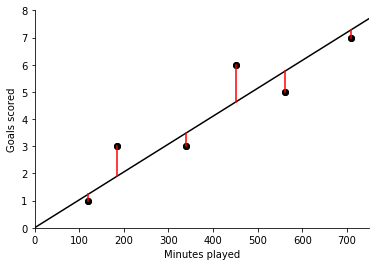

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Some made up data
minutes_played=np.array([120,452,185,708,340,561])
goals_scored=np.array([1,6,3,7,3,5])

#Set up dataframe
minutes_model = pd.DataFrame()
minutes_model = minutes_model.assign(minutes=minutes_played)
minutes_model = minutes_model.assign(goals=goals_scored)

fig,ax=plt.subplots(num=1)
ax.plot(minutes_played, goals_scored, linestyle='none', marker= '.', markerSize= 12, color='black')
ax.set_ylabel('Goals scored')
ax.set_xlabel('Minutes played')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((0,750))
plt.ylim((0,8))

#Slope of one goal per 90 played
#b=1/90
#Intercept
a=0


#Slope determined by linear regression
model_fit=smf.ols(formula='goals_scored ~ minutes_played -1 ', data=minutes_model).fit()
print(model_fit.summary())        
[b]=model_fit.params

x=np.arange(800,step=0.1)
y= a + b*x 

ax.plot(minutes_played, goals_scored, linestyle='none', marker= '.', markerSize= 12, color='black')
ax.plot(x, y, color='black')

#Show distances to line
for i,mp in enumerate(minutes_played):
    ax.plot([mp,mp],[goals_scored[i],a+b*mp], color='red')


plt.show()
# fig.savefig('Output/LinearRelationship' + str(round(1/b)) + '.pdf', dpi=None, bbox_inches="tight")   


